In [1]:
import numpy as np
import scipy as sp
import cv2
import os
import time
import matplotlib.pyplot as plt
from pathlib import Path
from numpy.fft import fft2, ifft2, fftshift, ifftshift

%matplotlib inline

In [9]:
def video_to_frames(num):
    print('\n\tVideo {}\n'.format(num))
    start_time = time.time()
    path_video = "./data_video/"
    # i = 1
    name_video = "Endoscope video ({}).mp4".format(num)
    path_video_frames = path_video + str(num) + '/'
    if not os.path.exists(path_video_frames):
        os.mkdir(path_video_frames)
    count = 0
    vidcap = cv2.VideoCapture(path_video+name_video)
    success, image = vidcap.read()
    success = True
    while success:
        print('=', end='', flush=True)
        # print ('Read a new frame: ', success)
        cv2.imwrite(path_video_frames + "frame_{:03d}.png".format(count), image)     # save frame as JPEG file
        count = count + 1
        success,image = vidcap.read()
    print('>\n')
    end_time = time.time()
    print("\n\tTime taken: {:.2f}\n".format(end_time-start_time))

In [10]:
for i in range(26):
    video_to_frames(i+1)


	Video 1

==============================================================================================================================================================================================================================================================================================>


	Time taken: 4.16


	Video 2

========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================>


	Time taken: 9.26

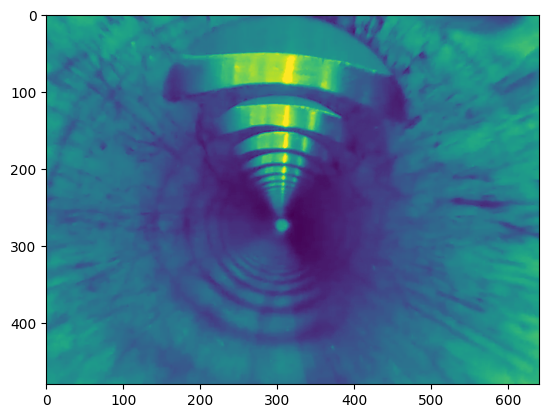

99.83586588541667
101.0


In [231]:
count = 16
start_time = time.time()
path_video = "./data_video/"
num = 1

path_video_frames = path_video + str(num) + '/'
    
im = cv2.imread(path_video_frames + "frame_{:03d}.png".format(count), cv2.IMREAD_GRAYSCALE).astype(float)
plt.imshow(im)
plt.show()
print(np.mean(np.mean(im)))
print(np.median(np.median(im)))

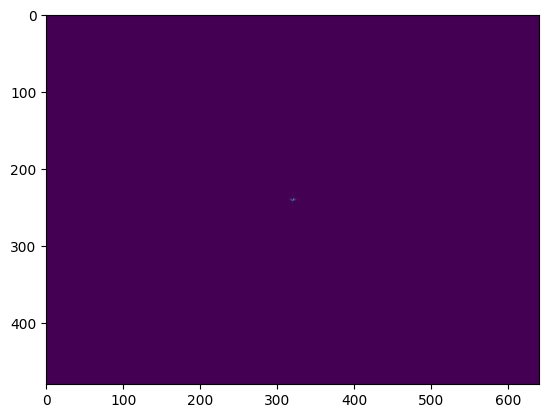

In [232]:
im_fft = fftshift(fft2(ifftshift(np.sqrt(im))))
im_fft[239:241,319:321] = 0
#im_fft = im_fft - np.mean(np.mean(im_fft))
plt.imshow((abs(im_fft)*abs(im_fft)).astype(float))

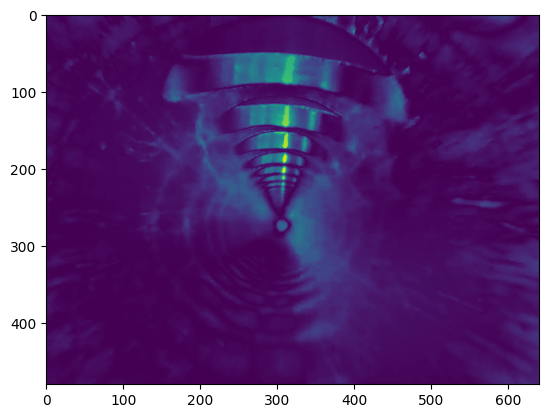

In [233]:
im_2 = ifftshift(ifft2(fftshift(im_fft)))
im_2 = (abs(im_2)*abs(im_2)).astype(float)
plt.imshow(im_2)

In [234]:
im_2.shape

(480, 640)

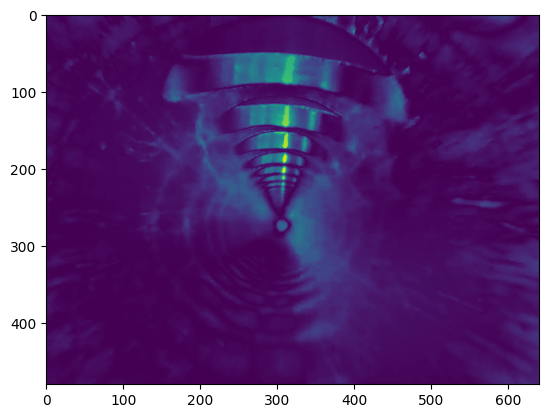

In [235]:
im_2_norm = 255 * im_2 / np.max(np.max(im_2))
plt.imshow(im_2_norm)

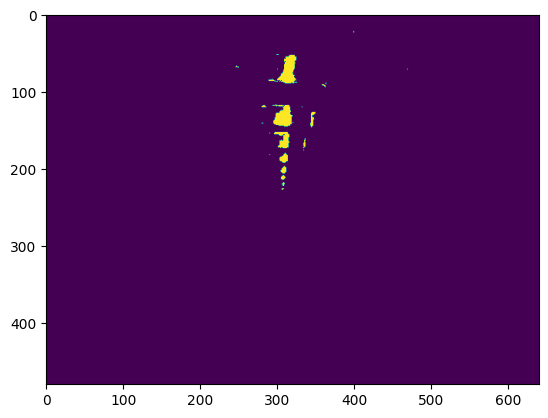

In [236]:
im_2_ex = []
for i in range(im_2_norm.shape[0]):
    arr_ex = []
    for j in range(im_2_norm.shape[1]):
        if im_2_norm[i,j] > 255*0.5:
            arr_ex.append(1)
        else:
            arr_ex.append(0)
    im_2_ex.append(arr_ex)
im_2_ex = np.array(im_2_ex)
plt.imshow(im_2_ex)

In [237]:
x = []
y = []
x_1_list = []
x_2_list = []
for i in range(im_2_ex.shape[0]):
    if sum(im_2_ex[i]) > 5:
        
        x_1 = 0
        x_2 = 0
        k = 0
        for j in range(1, im_2_ex.shape[1]):
            if im_2_ex[i, j] == 1 and im_2_ex[i, j-1] == 0:
                x_1 = j
            elif im_2_ex[i, j] == 0 and im_2_ex[i, j-1] == 1 and j-x_1>5:
                x_2 = j
                break
        if x_1 and x_2:
            y.append(i)
            x.append(int((x_1 + x_2)/2))
            x_1_list.append(x_1)
            x_2_list.append(x_2)

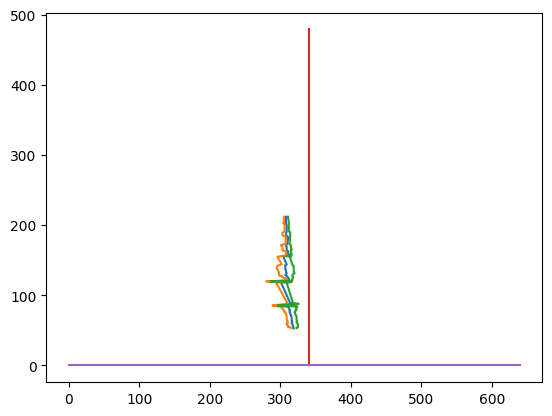

In [238]:
plt.plot(x, y)
plt.plot(x_1_list, y)
plt.plot(x_2_list, y)
plt.plot([340 for i in range(480)], [i for i in range(480)])
plt.plot([i for i in range(640)], [0 for i in range(640)])

In [239]:
angles = []
for i in range(5, len(x)):
    a = (x[i-5]-x[i])/abs(y[i]-y[i-5])
    angles.append(a)
print(np.mean(angles))
angle = np.arctan(np.mean(angles))
print(angle)

0.08775911588411593
0.08753485425963797


In [240]:
angles_1 = []
for i in range(5, len(x_1_list)):
    a = (x_1_list[i-5]-x_1_list[i])/abs(y[i]-y[i-5])
    angles_1.append(a)
print(np.mean(angles_1))
angle_1 = np.arctan(np.mean(angles_1))
print(angle_1)

0.11655913530913531
0.11603553817706813


In [241]:
x_0 = int((angle*x[-1] - angle_1*x_1_list[-1])/(angle-angle_1))
y_0 = int(angle*x_0 + y[-1] - angle*x[-1])
print(x_0, y_0)

295 210


In [248]:
dx_0 = 320 - 321
dy_0 = 240 - 153
if dy_0 < 0:
    im_new_x = im[abs(dy_0):,:]
else:
    im_new_x = im[:480-dy_0,:]
if dx_0 > 0:
    im_new = im_new_x[:,:640-dx_0]
else:
    im_new = im_new_x[:,abs(dx_0):]

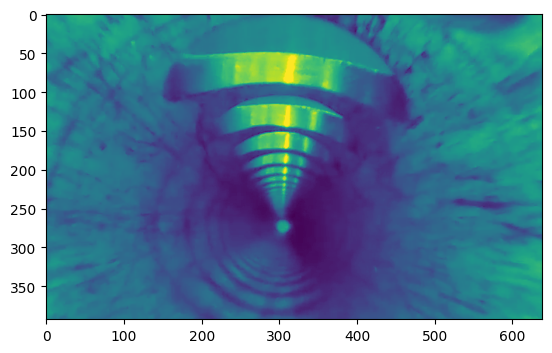

In [249]:
plt.imshow(im_new)

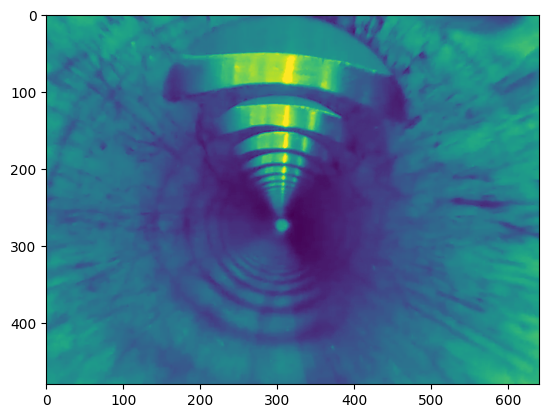

In [224]:
plt.imshow(im)

In [116]:
im_new.shape

(480, 602)

In [130]:
x_picks = []
y_picks = []
a = 0
b = 0
k = 0
for i in range(1, len(y)):
    if y[i] - y[i-1] > 1:
        k += 1
        b = i-1
        j = int((a+b)/2)
        x_picks.append(x[j])
        y_picks.append(y[j])
        a = i
    elif i == len(y) - 1:
        k += 1
        b = i
        j = int((a+b)/2)
        x_picks.append(x[j])
        y_picks.append(y[j])
print(k)
for a,b in zip(x_picks, y_picks):
    print(a, b)

3
305 63
304 90
314 111


In [133]:
folder = Path(path_video+ '8/')
len(list(folder.rglob("*")))

663

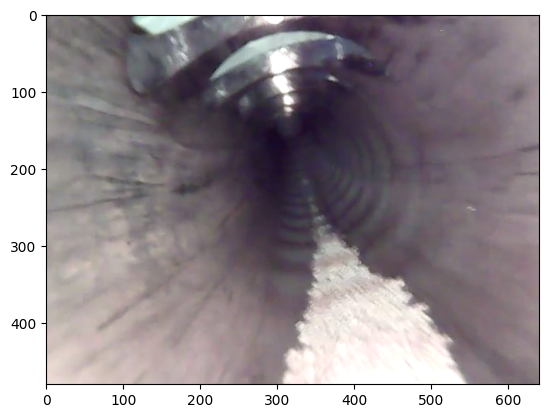

In [137]:
image = cv2.imread(path_video_frames + "frame_{:03d}.png".format(381))
plt.imshow(image)

In [2]:
def change_frames(num_video):
    print('\n\tVideo {}\n'.format(num_video))
    start_time = time.time()
    
    path_video = "./data_video/"
    path_frames = "./data_frames/"
    path_video_frames = path_video + str(num_video) + '/'
    path_frame = path_frames + str(num_video) + '/'
    if not os.path.exists(path_frames):
        os.mkdir(path_frames)
    if not os.path.exists(path_frame):
        os.mkdir(path_frame)
    folder = Path(path_video_frames)
    folder_size = len(list(folder.rglob("*")))
    for num in range(folder_size):
        try:
            print('=', end='', flush=True)
            im = cv2.imread(path_video_frames + "frame_{:03d}.png".format(num), cv2.IMREAD_GRAYSCALE).astype(float)
            # filter
            im_fft = fftshift(fft2(ifftshift(np.sqrt(im))))
            im_fft[239:241,319:321] = 0
            im_2 = ifftshift(ifft2(fftshift(im_fft)))
            im_2 = (abs(im_2)*abs(im_2)).astype(float)
            # normalize
            im_2_norm = 255 * im_2 / np.max(np.max(im_2))

            # suka blyat
            p = 0.7
            step = 10
            while True:
                im_2_ex = []
                for i in range(im_2_norm.shape[0]):
                    arr_ex = []
                    for j in range(im_2_norm.shape[1]):
                        if im_2_norm[i,j] > 255*p:
                            arr_ex.append(1)
                        else:
                            arr_ex.append(0)
                    im_2_ex.append(arr_ex)
                im_2_ex = np.array(im_2_ex)
                # plt.imshow(im_2_ex)
                # picks
                x = []
                y = []
                x_1_list = []
                x_2_list = []
                for i in range(int(im_2_ex.shape[0]*0.7)):
                    if sum(im_2_ex[i]) > step:
                        x_1 = 0
                        x_2 = 0
                        k = 0
                        for j in range(1, im_2_ex.shape[1]):
                            if im_2_ex[i, j] == 1 and im_2_ex[i, j-1] == 0:
                                x_1 = j
                            elif im_2_ex[i, j] == 0 and im_2_ex[i, j-1] == 1 and j-x_1>step:
                                x_2 = j
                                break
                        if x_1 and x_2:
                            y.append(i)
                            x.append(int((x_1 + x_2)/2))
                            x_1_list.append(x_1)
                            x_2_list.append(x_2)
                if len(x)<5:
                    p -= 0.05
                    continue
                # angles
                angles = []
                angles_1 = []
                for i in range(5, len(x)):
                    a = (x[i-5]-x[i])/abs(y[i]-y[i-5])
                    angles.append(a)
                    a_1 = (x_1_list[i-5]-x_1_list[i])/abs(y[i]-y[i-5])
                    angles_1.append(a_1)
                angle = np.arctan(np.mean(angles))
                angle_1 = np.arctan(np.mean(angles_1))

                # center of circle
                try:
                    x_0 = int((angle*x[-1] - angle_1*x_1_list[-1])/(angle-angle_1))
                    y_0 = int(angle*x_0 + y[-1] - angle*x[-1])
                    break
                except:
                    if p < 0.5:
                        step -= 1
                    else:
                        p -= 0.05
                    continue
            # ind of picks
            x_picks = []
            y_picks = []
            a = 0
            b = 0
            for i in range(1, len(y)):
                if y[i] - y[i-1] > 1:
                    b = i-1
                    j = int((a+b)/2)
                    x_picks.append(x[j])
                    y_picks.append(y[j])
                    a = i
                elif i == len(y) - 1:
                    b = i
                    j = int((a+b)/2)
                    x_picks.append(x[j])
                    y_picks.append(y[j])
            with open(path_frame + 'picks.txt', 'a') as file:
                # file.write(str(num))
                for a,b in zip(x_picks, y_picks):
                    file.write('{} {} '.format(a, b))
                file.write('\n')
            # update frame
            image = cv2.imread(path_video_frames + "frame_{:03d}.png".format(num))
            dx_0 = 320 - x_0
            dy_0 = 240 - y_0
            if dy_0 < 0:
                image_new_x = image[abs(dy_0):,:]
            else:
                image_new_x = image[:480-dy_0,:]
            if dx_0 > 0:
                image_new = image_new_x[:,:640-dx_0]
            else:
                image_new = image_new_x[:,abs(dx_0):]
            cv2.imwrite(path_frame + "frame_{:03d}.png".format(num), image_new)
            with open(path_frame + 'angle.txt', 'a') as file:
                file.write(str(angle))
        except:
            pass
    print('>\n')
    end_time = time.time()
    print("\n\tTime taken: {:.2f}\n".format(end_time-start_time))

In [3]:
for i in range(26):
    change_frames(i+1)


	Video 1

==

C:\Users\semak\AppData\Local\Temp\ipykernel_10716\3899756535.py:79: RuntimeWarning: invalid value encountered in scalar divide
  x_0 = int((angle*x[-1] - angle_1*x_1_list[-1])/(angle-angle_1))


=

C:\Users\semak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\semak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


==============321 153

C:\Users\semak\AppData\Local\Temp\ipykernel_10716\3899756535.py:79: RuntimeWarning: divide by zero encountered in scalar divide
  x_0 = int((angle*x[-1] - angle_1*x_1_list[-1])/(angle-angle_1))


===========================================================================================================================================================================================================================================>


	Time taken: 76.34


	Video 2

=================362 77
=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================>


	Time taken: 199.50


	Video 3

=================336 86
===============

===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================>


	Time tak

========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================